In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Arquivos já estão divididos em treino, validação e teste.

In [ ]:
# Referência Raquel
# src_path1 = '/content/gdrive/MyDrive/TrabalhoFinal_CleanDataset'
# train_path = os.path.join(src_path1, 'train_v2')
# train_path_emp = os.path.join(train_path, 'empresas')
# train_path_Nemp = os.path.join(train_path, 'nao_empresas')

# #src_path = '/content/gdrive/MyDrive/619_ProjetoFinal/Dados_ProjetoFinal/split_train_val_test'
# src_path = '/content/gdrive/MyDrive/Dados_ProjetoFinal_MDC010-INF019/split_train_val_test'
# val_path = os.path.join(src_path, 'val')
# test_path = os.path.join(src_path, 'test')

# val_path_emp = os.path.join(val_path, 'imagens_empresas')
# val_path_Nemp = os.path.join(val_path, 'imagens_nao_empresas')

# test_path_emp = os.path.join(test_path, 'imagens_empresas')
# test_path_Nemp = os.path.join(test_path, 'imagens_nao_empresas')

In [ ]:
# Referência Igor
src_path = '/content/gdrive/MyDrive/619_ProjetoFinal/Dados_ProjetoFinal/split_train_val_test'
#src_path = '/content/gdrive/MyDrive/Dados_ProjetoFinal_MDC010-INF019/split_train_val_test'
train_path = os.path.join(src_path, 'train_v2')
val_path = os.path.join(src_path, 'val')
test_path = os.path.join(src_path, 'test')

train_path_emp = os.path.join(train_path, 'imagens_empresas')
train_path_Nemp = os.path.join(train_path, 'imagens_nao_empresas')

val_path_emp = os.path.join(val_path, 'imagens_empresas')
val_path_Nemp = os.path.join(val_path, 'imagens_nao_empresas')

test_path_emp = os.path.join(test_path, 'imagens_empresas')
test_path_Nemp = os.path.join(test_path, 'imagens_nao_empresas')

In [ ]:
print('Número de imagens de empresas (treinamento):', len(os.listdir(train_path_emp)))
print('Número de imagens de não empresas (treinamento):', len(os.listdir(train_path_Nemp)))
print('Número de imagens de empresas (validacao):', len(os.listdir(val_path_emp)))
print('Número de imagens de não empresas (validacao):', len(os.listdir(val_path_Nemp)))
print('Número de imagens de empresas (teste):', len(os.listdir(test_path_emp)))
print('Número de imagens de não empresas (teste):', len(os.listdir(test_path_Nemp)))

#### Imprimindo algumas imagens usadas no treino:

In [ ]:
numeroFiguras = 4

arrImagEmp = os.listdir(train_path_emp)
arrImagEmp = random.sample(arrImagEmp, numeroFiguras)
print(arrImagEmp)

arrImagNEmp = os.listdir(train_path_Nemp)
arrImagNEmp = random.sample(arrImagNEmp, numeroFiguras)
print(arrImagNEmp)

['7939.jpg', '1461.jpg', '3932.jpg', '4414.jpg']
['5632.jpg', '7666.jpg', '6951.jpg', '8261.jpg']


Imagens de empresas:


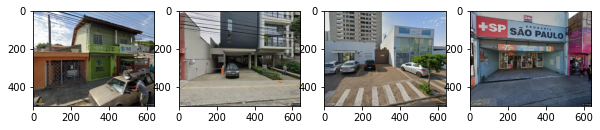

In [ ]:
fig = plt.figure(figsize=(10,5))

print("Imagens de empresas:")
for i in range(4):
    # Imagens de empresas:
    plt.subplot(240 + 1 + i)
    img = plt.imread(os.path.join(train_path_emp,arrImagEmp[i]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

Imagens de não empresas:


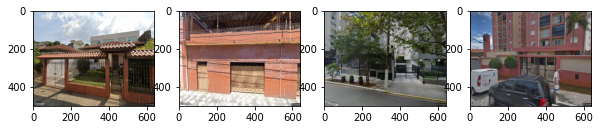

In [ ]:
fig = plt.figure(figsize=(10,5))

print("Imagens de não empresas:")
for i in range(4):
    # Imagens de não empresas:
    z = i + 4
    plt.subplot(240 + 1 + z)
    img = plt.imread(os.path.join(train_path_Nemp,arrImagNEmp[i]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

### Gerando dados de treino, validação e test.

In [ ]:
import tensorflow as tf
from PIL import Image
from sklearn.utils.class_weight import compute_class_weight
from keras.preprocessing.image import ImageDataGenerator

#Definindo funções úteis para fazer os plots das imagens:
def plotImages(imgList, n_row=1, n_col=1):
    _, axs = plt.subplots(n_row, n_col, figsize=(25,5))
    axs = axs.flatten()
    for img, ax in zip(imgList, axs):
        ax.imshow(np.uint8(img), interpolation='nearest')
    plt.show()

#### Dados com aumentação.

##### Dados sem pré-processamento.

In [ ]:
# Dados de treino e validação com aumentação:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        directory=train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

validation_generator = train_datagen.flow_from_directory(
        directory=val_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

batch_X_train, batch_Y_train = train_generator.next()

# Calcula os pesos:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_generator_sa.labels), y=train_generator_sa.labels)
train_class_weights = dict(enumerate(class_weights))
print('train_class_weights: ', train_class_weights)

Found 6548 images belonging to 2 classes.
Found 2200 images belonging to 2 classes.
train_class_weights:  {0: 1.2175529936779472, 1: 0.8484063228815756}


##### Dados com pré-processamento para efficientNet.

In [ ]:
# Dados de treino e validação com aumentação:
train_datagen_EfficientNet = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator_EfficientNet = train_datagen_EfficientNet.flow_from_directory(
        directory=train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=True)

validation_generator_EfficientNet = train_datagen_EfficientNet.flow_from_directory(
        directory=val_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

batch_X_train_EfficientNet, batch_Y_train_EfficientNet = train_generator_EfficientNet.next()

print(batch_X_train_EfficientNet.shape, batch_Y_train_EfficientNet.shape)

Found 6548 images belonging to 2 classes.
Found 2200 images belonging to 2 classes.
(32, 224, 224, 3) (32, 2)


Imagens com aumentações


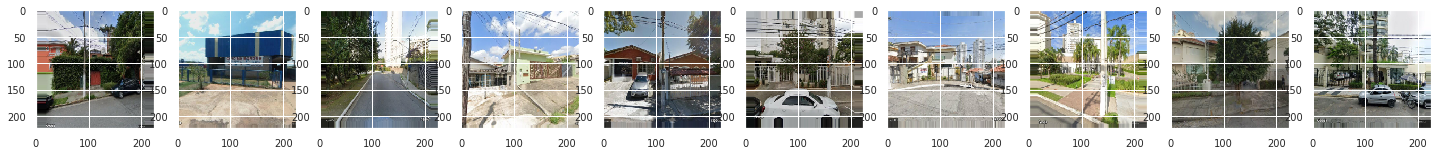

Imagens com aumentações + pré-processamento EfficientNet


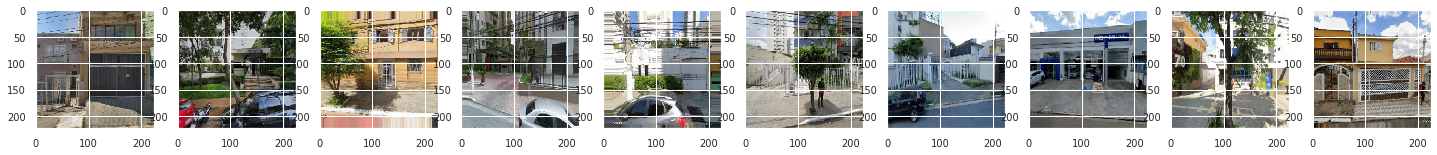

(None, None)

In [ ]:
print("Imagens com aumentações"), plotImages(batch_X_train[:10], 1, 10)
print("Imagens com aumentações + pré-processamento EfficientNet"), plotImages(batch_X_train_EfficientNet[:10], 1, 10)

##Modelo EfficientNet

###Gerando o modelo:

In [ ]:
# Carregamento do modelo pré-treinado SEM as camadas densas (include_top = False)
model = tf.keras.applications.EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Congela camadas pré-treinadas
for layer in model.layers:
    layer.trainable = False

# Insere novas camadas no fim da rede para classificação
modelEfficientNetB7 = tf.keras.Sequential([
  model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(2, activation='softmax')
])

modelEfficientNetB7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 7, 7, 2560)       64097687  
                                                                 
 global_average_pooling2d (G  (None, 2560)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2)                 5122      
                                                                 
Total params: 64,102,809
Trainable params: 5,122
Non-trainable params: 64,097,687
_________________________________________________________________


###Treinando modelo usando dados com aumentação:

In [ ]:
# Instancia um otimizador SGD, compila e treina o modelo completo
sgd = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, decay=0.001, nesterov=True)

modelEfficientNetB7.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=[tf.keras.metrics.AUC(),'accuracy'])

history_modelEfficientNetB7 = modelEfficientNetB7.fit(train_generator_EfficientNet, epochs=25, #callbacks=[roc_resnet],
                  validation_data=validation_generator_EfficientNet, class_weight=train_class_weights)

Epoch 1/25
205/205 [==============================] - 625s 3s/step - loss: 0.5201 - auc: 0.8405 - accuracy: 0.7586 - val_loss: 0.4433 - val_auc: 0.8862 - val_accuracy: 0.8068
Epoch 2/25
205/205 [==============================] - 502s 2s/step - loss: 0.4424 - auc: 0.8845 - accuracy: 0.8022 - val_loss: 0.4167 - val_auc: 0.8967 - val_accuracy: 0.8168
Epoch 3/25
205/205 [==============================] - 500s 2s/step - loss: 0.4265 - auc: 0.8918 - accuracy: 0.8143 - val_loss: 0.4014 - val_auc: 0.9036 - val_accuracy: 0.8223
Epoch 4/25
205/205 [==============================] - 510s 2s/step - loss: 0.4188 - auc: 0.8949 - accuracy: 0.8108 - val_loss: 0.3980 - val_auc: 0.9050 - val_accuracy: 0.8295
Epoch 5/25
205/205 [==============================] - 541s 3s/step - loss: 0.4130 - auc: 0.8977 - accuracy: 0.8157 - val_loss: 0.3979 - val_auc: 0.9047 - val_accuracy: 0.8309
Epoch 6/25
205/205 [==============================] - 584s 3s/step - loss: 0.4119 - auc: 0.8981 - accuracy: 0.8172 - val_loss

In [ ]:
history_modelEfficientNetB7.history['val_accuracy']

[0.8068181872367859,
 0.8168181777000427,
 0.8222727179527283,
 0.8295454382896423,
 0.8309090733528137,
 0.8204545378684998,
 0.8313636183738708,
 0.8259090781211853,
 0.8290908932685852,
 0.8218181729316711,
 0.8331817984580994,
 0.8259090781211853,
 0.8345454335212708,
 0.8322727084159851,
 0.8304545283317566,
 0.8272727131843567,
 0.8277272582054138,
 0.8299999833106995,
 0.8286363482475281,
 0.824999988079071,
 0.8245454430580139,
 0.8236363530158997,
 0.8290908932685852,
 0.8263636231422424,
 0.8345454335212708]

####Salva e importa modelo modelEfficientNetB7.

In [ ]:
# Salvando o modelo

import h5py
# save model and architecture to single file
modelEfficientNetB7.save("/content/gdrive/MyDrive/Mineracao de Dados Complexos/INF 0619-010 - Trabalho Final - Zanoni/Modelos/modelEfficientNetB7.h5")
print("Saved model to disk")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Saved model to disk


In [ ]:
#Carrega pesos salvos.
# from keras.models import load_model
# modelEfficientNetB7 = load_model("/content/gdrive/MyDrive/Mineracao de Dados Complexos/INF 0619-010 - Trabalho Final - Zanoni/Modelos/modelEfficientNetB7.h5")
# print("Loaded model from disk")

####Acurácia balanceada com dados com aumentação.

In [ ]:
#Reseta o gerador para gerar os dados usados no nosso predict.
validation_generator.reset()

In [ ]:
#Faz a predição à partir dos dados do nosso gerador utilizando o modelo baseline.
y_pred = modelEfficientNetB7.predict(validation_generator)

In [ ]:
# Converte os valores preditos para números inteiros nos valores de 0 ou 1.
y_pred_int = (y_pred > 0.5).astype(np.int32)

In [ ]:
# A lista acima é formada por listas de tamanho 2 onde nos interessa apenas o segundo item de cada lista, portanto o que fazemos nesse trecho é gerar 
# uma nova lista de inteiros selecionando apenas o 2º item de cada lista presente no y_pred_nn.
y_pred_nn = []
for item in y_pred_int:
    y_pred_nn.append(item[1])

In [ ]:
# Novamente faz o reset do gerador para puxarmos os dados do target.
validation_generator.reset()

In [ ]:
# Gera uma lista com os rótulos de cada imagem.
Y_resnet_val = []

while True:
    x,y = validation_generator.next()
    
    new_list = []
    for item in y:
        new_list.append(item)
        
    Y_resnet_val += new_list
    if len(Y_resnet_val) > 2200:
        break

In [ ]:
# Acurácia balanceada.
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(validation_generator.labels, y_pred_nn, sample_weight=None, adjusted=False)

0.8207412917899071

####Resultados do modelo EfficientNetB7 usando dados com aumentação.

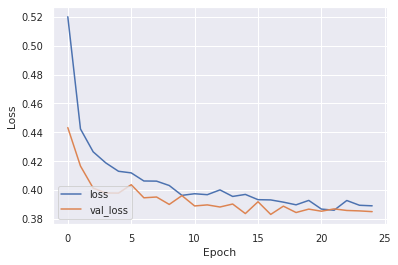

In [ ]:
plt.plot(history_modelEfficientNetB7.history['loss'], label='loss')
plt.plot(history_modelEfficientNetB7.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower left')

#test_loss, test_acc = modelB.evaluate(batch_val_X_proc, batch_val_Y_proc, verbose=2)

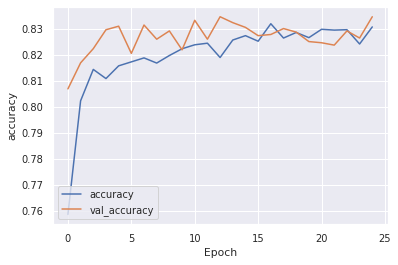

In [ ]:
plt.plot(history_modelEfficientNetB7.history['accuracy'], label='accuracy')
plt.plot(history_modelEfficientNetB7.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower left')

#test_loss, test_acc = frozen_model.evaluate(batch_val_X_proc, batch_val_Y_proc, verbose=2)

In [ ]:
# Matriz de confusão.
import seaborn as sns
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4,suppress=True)

# Matriz de confusão
cm = confusion_matrix(validation_generator_EfficientNet.classes, y_pred_nn)



Acurácia balanceada: 0.8207


Matriz de confusão balanceada


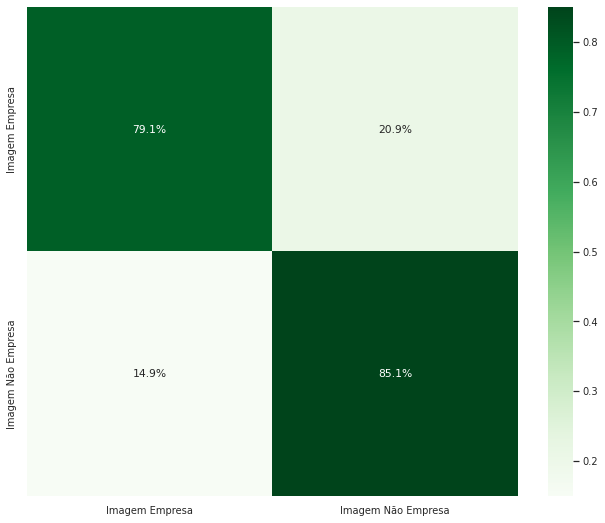

In [ ]:
# Matriz de confusão normalizada
num_classes=2
categories = ['Imagem Empresa', 'Imagem Não Empresa']
cmn = cm / cm.astype(np.float).sum(axis=1, keepdims=True)
balanced_acc = np.trace(cmn) / num_classes
print("\n\nAcurácia balanceada:", round(balanced_acc,4))

print("\n\nMatriz de confusão balanceada")
plt.figure(figsize = (11,9))
sns.set(font_scale=0.9)
sns.heatmap(cmn, annot=True, fmt='.1%', xticklabels=categories, yticklabels=categories, cmap = 'Greens')